# Giriş işlemleri

In [1]:
import os
is_colab = False # eğer colab kullanıyorsanız True yapın
if is_colab:
    from google.colab import drive
    drive.mount('/content/drive')
root_path = os.getcwd()  # dosyanın bulunduğu klasör
print(root_path)

/home/internet/Desktop/gsm8k-tr-semantik-analiz/benzerlik_olcumu


## Gerekli kütüphaneleri yükle

In [2]:
import subprocess

# gereksinimler dosyasının yolu
requirements_path = os.path.join(root_path, "gereksinimler.txt")

# gereksinimler yükleniyor
try:
    print("Gereksinimler yükleniyor...")
    subprocess.run(["pip", "install", "-r", requirements_path], check=True)
    print("Gereksinimler başarıyla yüklendi.")
except subprocess.CalledProcessError:
    print("Gereksinimler yüklenirken hata oluştu.")
except FileNotFoundError:
    print(f"Dosya bulunamadı: {requirements_path}")

Gereksinimler yükleniyor...
Gereksinimler başarıyla yüklendi.


## Dosya dizinini sistem yoluna ekle

In [3]:
import sys

sys.path.append(root_path)
print(f"'{root_path}' kütüphane arama yoluna eklendi.")

'/home/internet/Desktop/gsm8k-tr-semantik-analiz/benzerlik_olcumu' kütüphane arama yoluna eklendi.


## Yerel kod dosyalarını içe aktar

In [ ]:
from dosya_islemleri import (load_model, load_dataset, read_embedding_from_file, read_probability_from_file, read_top1_top5_results_json)
from benzerlik_islemleri import calculate_and_save_similarity_scores, get_and_save_all_top5_matches
from gorsellestir import save_tsne_png, plot_two_tsne_results
from gomme_islemleri import (calculate_and_save_raw_embeddings_from_dataset, tsne_sonuc_olustur, get_multi_token_embeddings, 
                             apply_multi_tsne)
from top_islemleri import calculate_top1_top5_scores

/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Cihaz tipini al

In [5]:
import torch
# cihaz tipini al
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Kullanılan cihaz tipi: {device}")

Kullanılan cihaz tipi: cpu


## Modelleri tanımla

In [6]:
model_names = [
    "intfloat/multilingual-e5-base",                                # 278M  - 81
    "ibm-granite/granite-embedding-107m-multilingual",              # 107M  - 48
    "intfloat/multilingual-e5-small",                               # 118M  - 36
    "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",  # 118M  - 62
    "shibing624/text2vec-base-multilingual",                        # 118M  - 77 
    "ytu-ce-cosmos/turkish-colbert"
    ]

In [7]:
# veri kümesi yükleniyor
df = load_dataset()

Veri kümesi yükleniyor: /home/internet/Desktop/gsm8k-tr-semantik-analiz/benzerlik_olcumu/../gsm8k_tr_1000_soru_cevap.csv


# Gömme (embedding) hesaplama işleri

In [8]:
def get_save_prefix(model_name):
    return model_name.replace("/", "_").replace("-", "_")

In [9]:
# her model için
for i, model_name in enumerate(model_names):
        save_prefix = get_save_prefix(model_name)
        model, tokenizer = load_model(model_name, device_type=device)
        calculate_and_save_raw_embeddings_from_dataset(model, tokenizer, df, save_prefix, device)
        print(f"Embeddingler hesaplandı ve kaydedildi: {model_name} ({i+1}/{len(model_names)})")

Model yükleniyor: intfloat/multilingual-e5-base
Model yüklendi. intfloat/multilingual-e5-base
Hali hazırda hesaplanmış gömme vektörleri sayısı: 876, bu kayıtlar atlanıyor.


Embeddingler hesaplandı ve kaydedildi: intfloat/multilingual-e5-base (1/6)
Model yükleniyor: ibm-granite/granite-embedding-107m-multilingual
Model yüklendi. ibm-granite/granite-embedding-107m-multilingual
Hali hazırda hesaplanmış gömme vektörleri sayısı: 10, bu kayıtlar atlanıyor.


Embeddingler hesaplandı ve kaydedildi: ibm-granite/granite-embedding-107m-multilingual (2/6)
Model yükleniyor: intfloat/multilingual-e5-small
Model yüklendi. intfloat/multilingual-e5-small
Hali hazırda hesaplanmış gömme vektörleri sayısı: 10, bu kayıtlar atlanıyor.


Embeddingler hesaplandı ve kaydedildi: intfloat/multilingual-e5-small (3/6)
Model yükleniyor: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Model yüklendi. sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Hali hazırda hesaplanmış gömme vektörleri sa

Satır 876 işlenemedi: Expecting ',' delimiter: line 1 column 3536 (char 3535)
intfloat_multilingual_e5_base_embeddings.json dosyasından 875 gömme vektörü yüklendi.


/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Görselleştirme kaydedildi: /home/internet/Desktop/gsm8k-tr-semantik-analiz/benzerlik_olcumu/tsne_results/intfloat_multilingual_e5_base_tsne_results.png
ibm_granite_granite_embedding_107m_multilingual_embeddings.json dosyasından 10 gömme vektörü yüklendi.


/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Görselleştirme kaydedildi: /home/internet/Desktop/gsm8k-tr-semantik-analiz/benzerlik_olcumu/tsne_results/ibm_granite_granite_embedding_107m_multilingual_tsne_results.png
intfloat_multilingual_e5_small_embeddings.json dosyasından 10 gömme vektörü yüklendi.


/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Görselleştirme kaydedildi: /home/internet/Desktop/gsm8k-tr-semantik-analiz/benzerlik_olcumu/tsne_results/intfloat_multilingual_e5_small_tsne_results.png
sentence_transformers_paraphrase_multilingual_MiniLM_L12_v2_embeddings.json dosyasından 10 gömme vektörü yüklendi.


/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Görselleştirme kaydedildi: /home/internet/Desktop/gsm8k-tr-semantik-analiz/benzerlik_olcumu/tsne_results/sentence_transformers_paraphrase_multilingual_MiniLM_L12_v2_tsne_results.png
shibing624_text2vec_base_multilingual_embeddings.json dosyasından 10 gömme vektörü yüklendi.


/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Görselleştirme kaydedildi: /home/internet/Desktop/gsm8k-tr-semantik-analiz/benzerlik_olcumu/tsne_results/shibing624_text2vec_base_multilingual_tsne_results.png
ytu_ce_cosmos_turkish_colbert_embeddings.json dosyasından 10 gömme vektörü yüklendi.


/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/internet/Desktop/gsm8k-tr-semantik-analiz/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Görselleştirme kaydedildi: /home/internet/Desktop/gsm8k-tr-semantik-analiz/benzerlik_olcumu/tsne_results/ytu_ce_cosmos_turkish_colbert_tsne_results.png


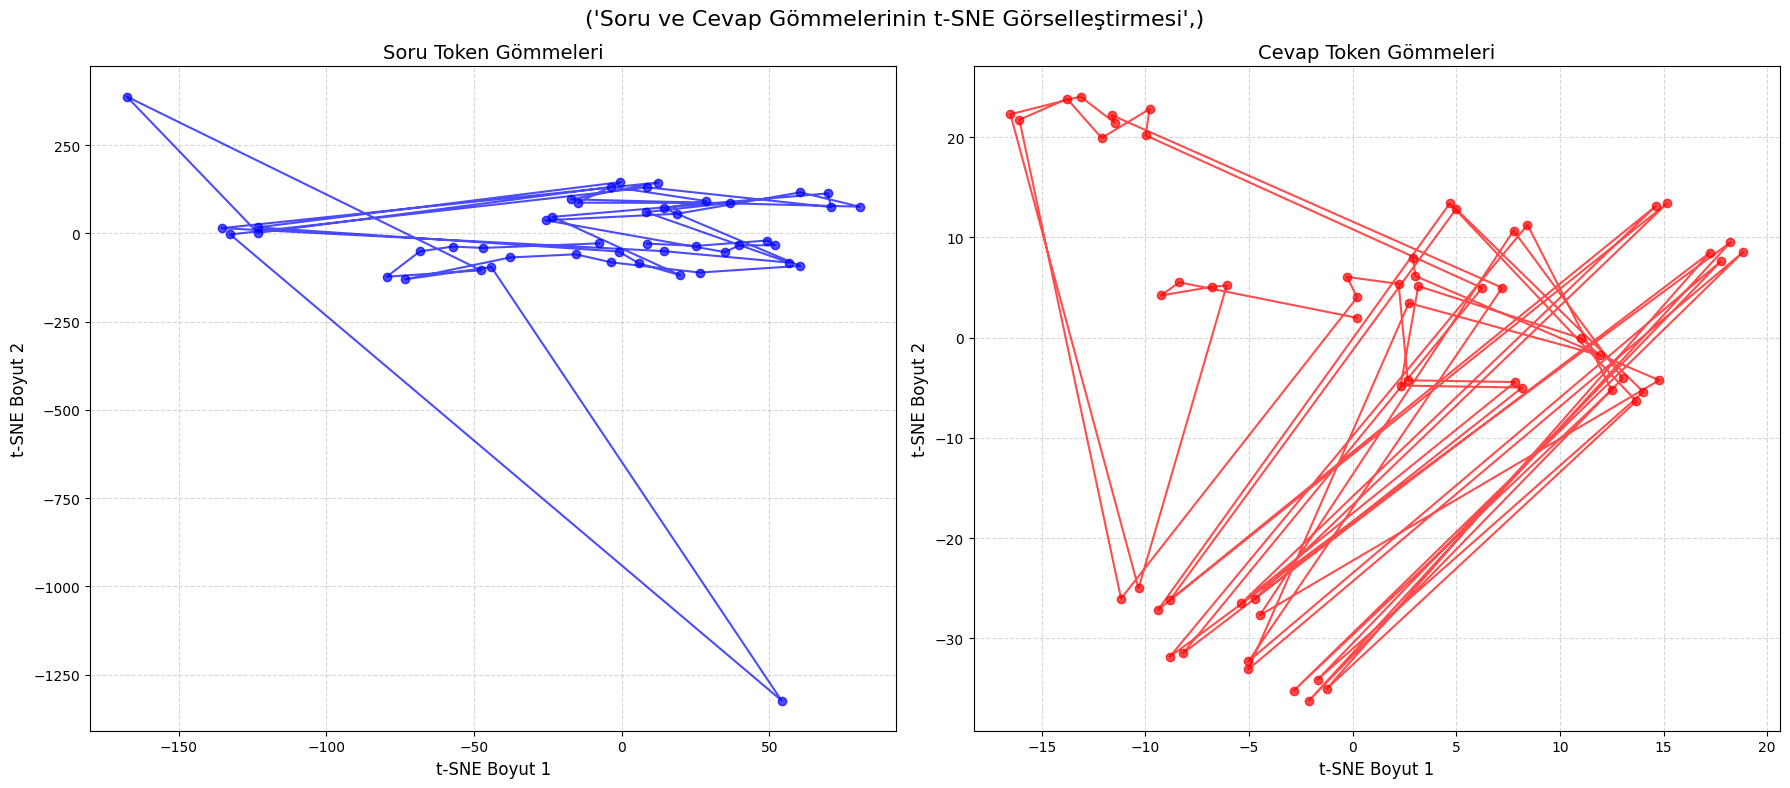

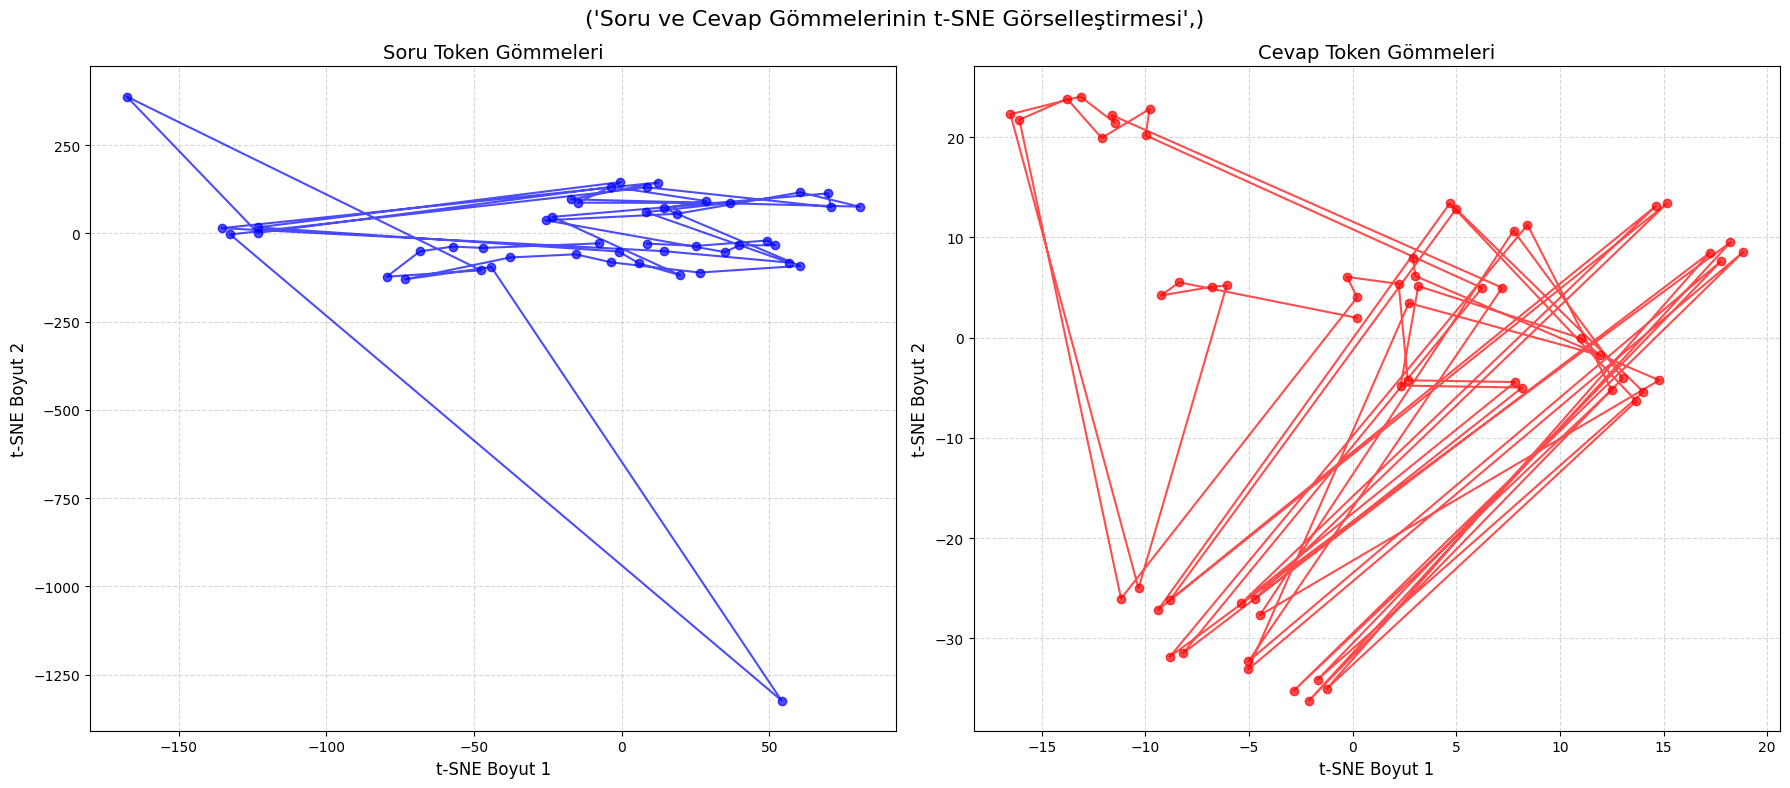

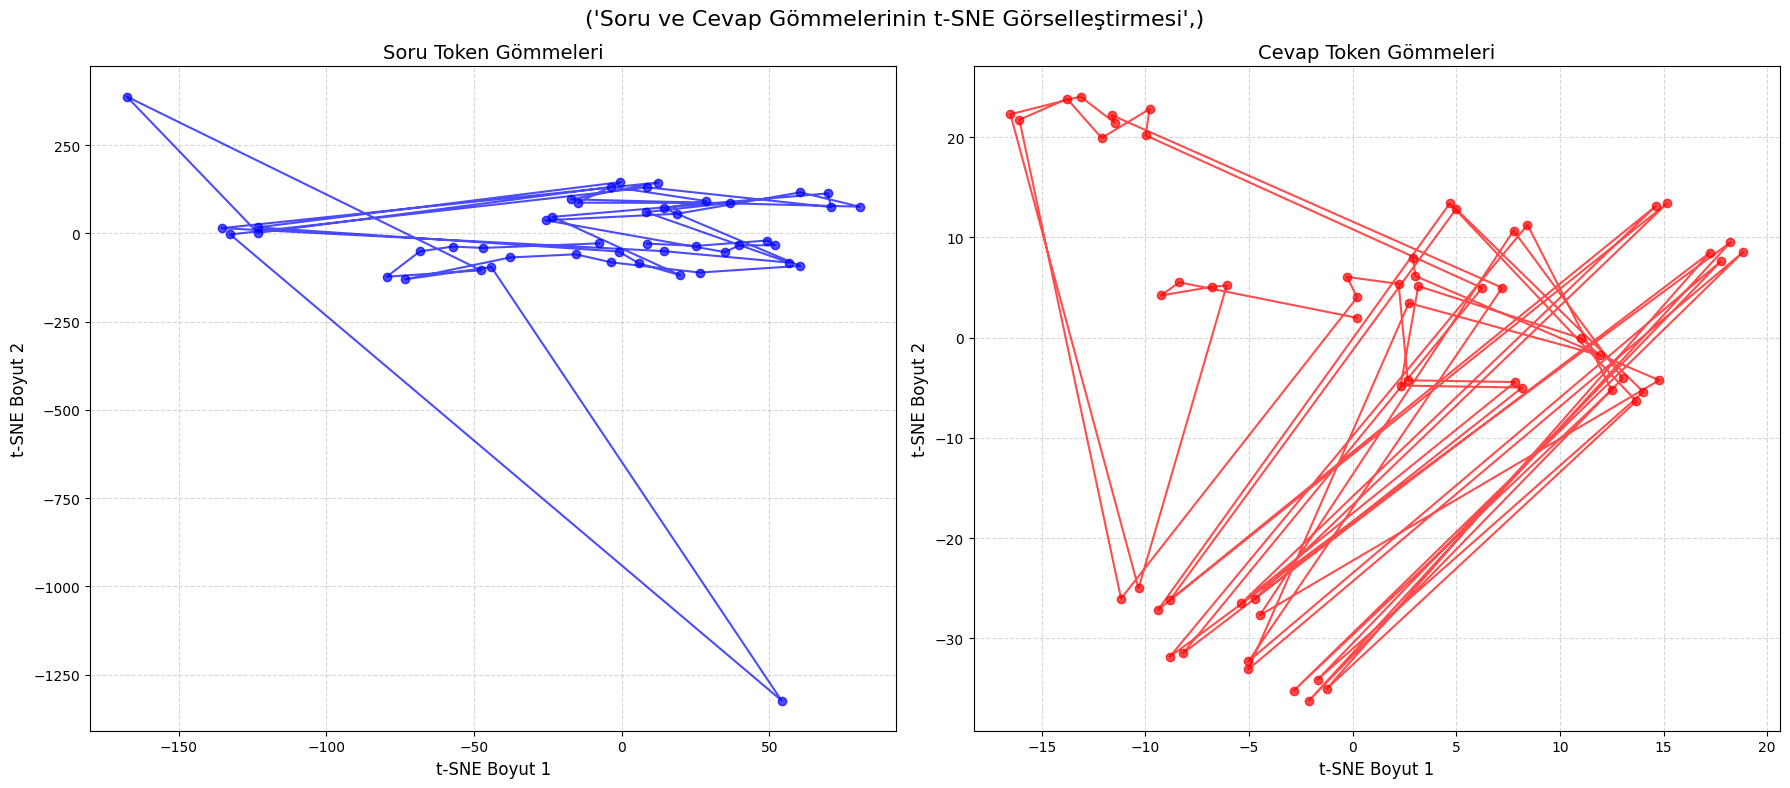

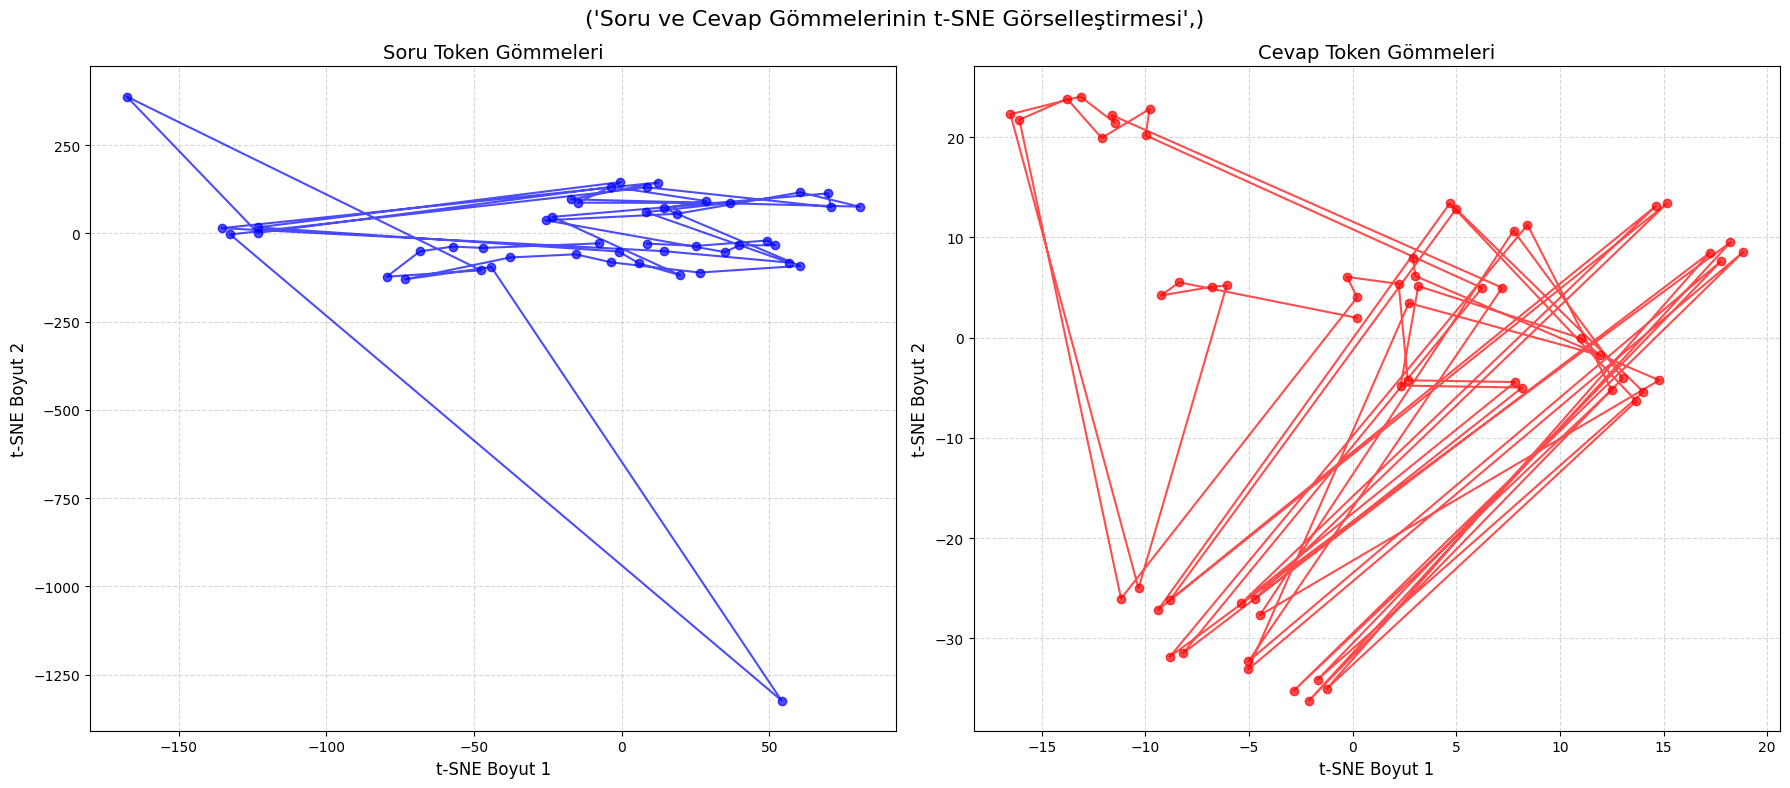

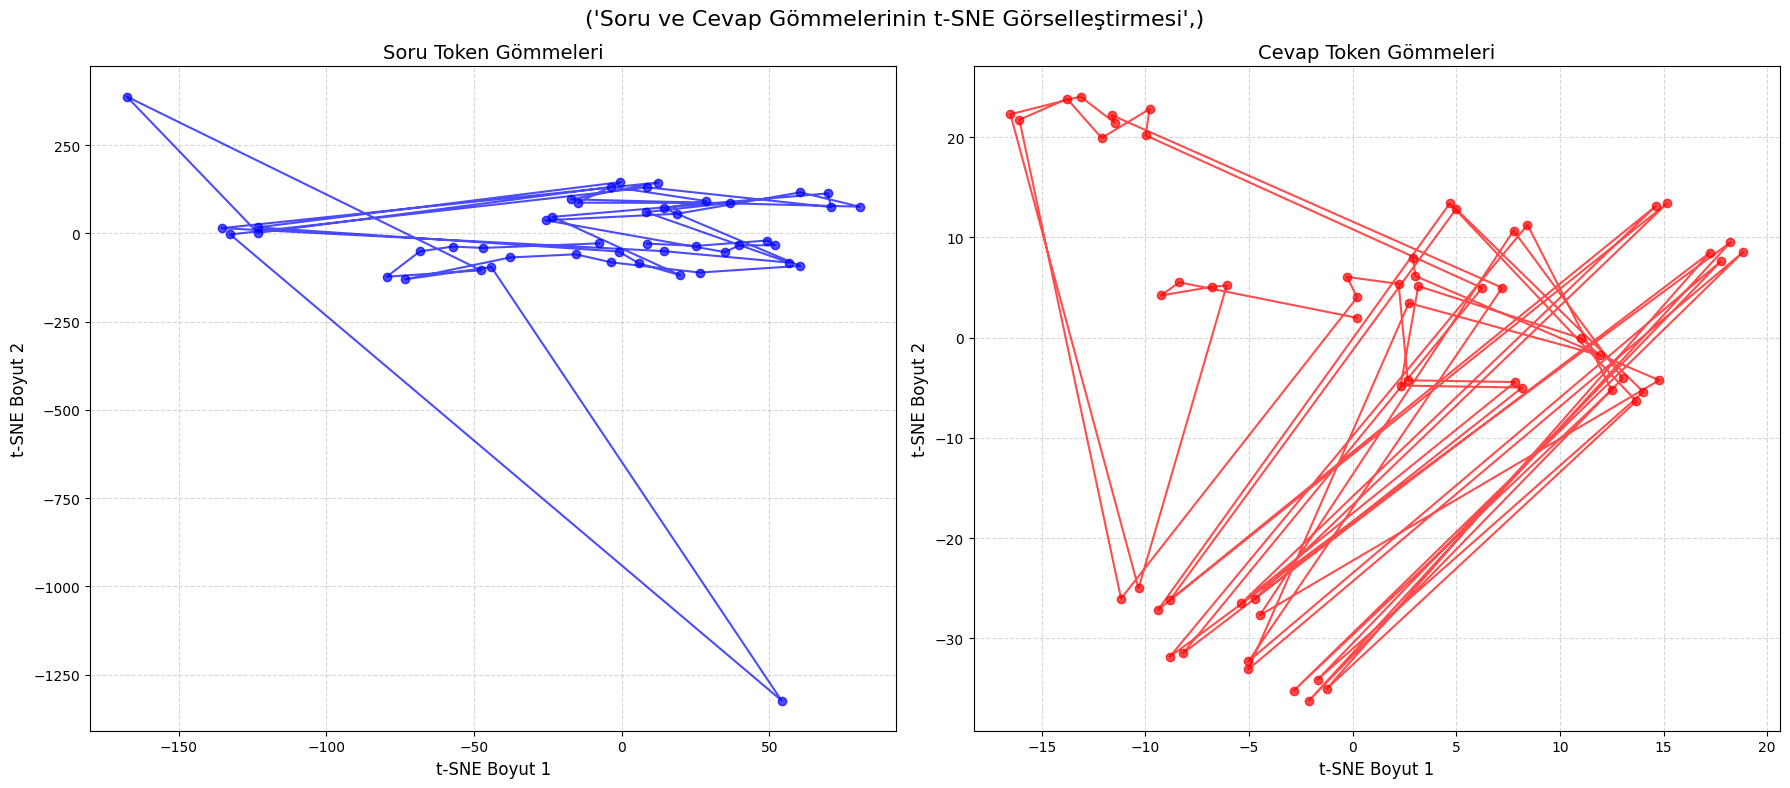

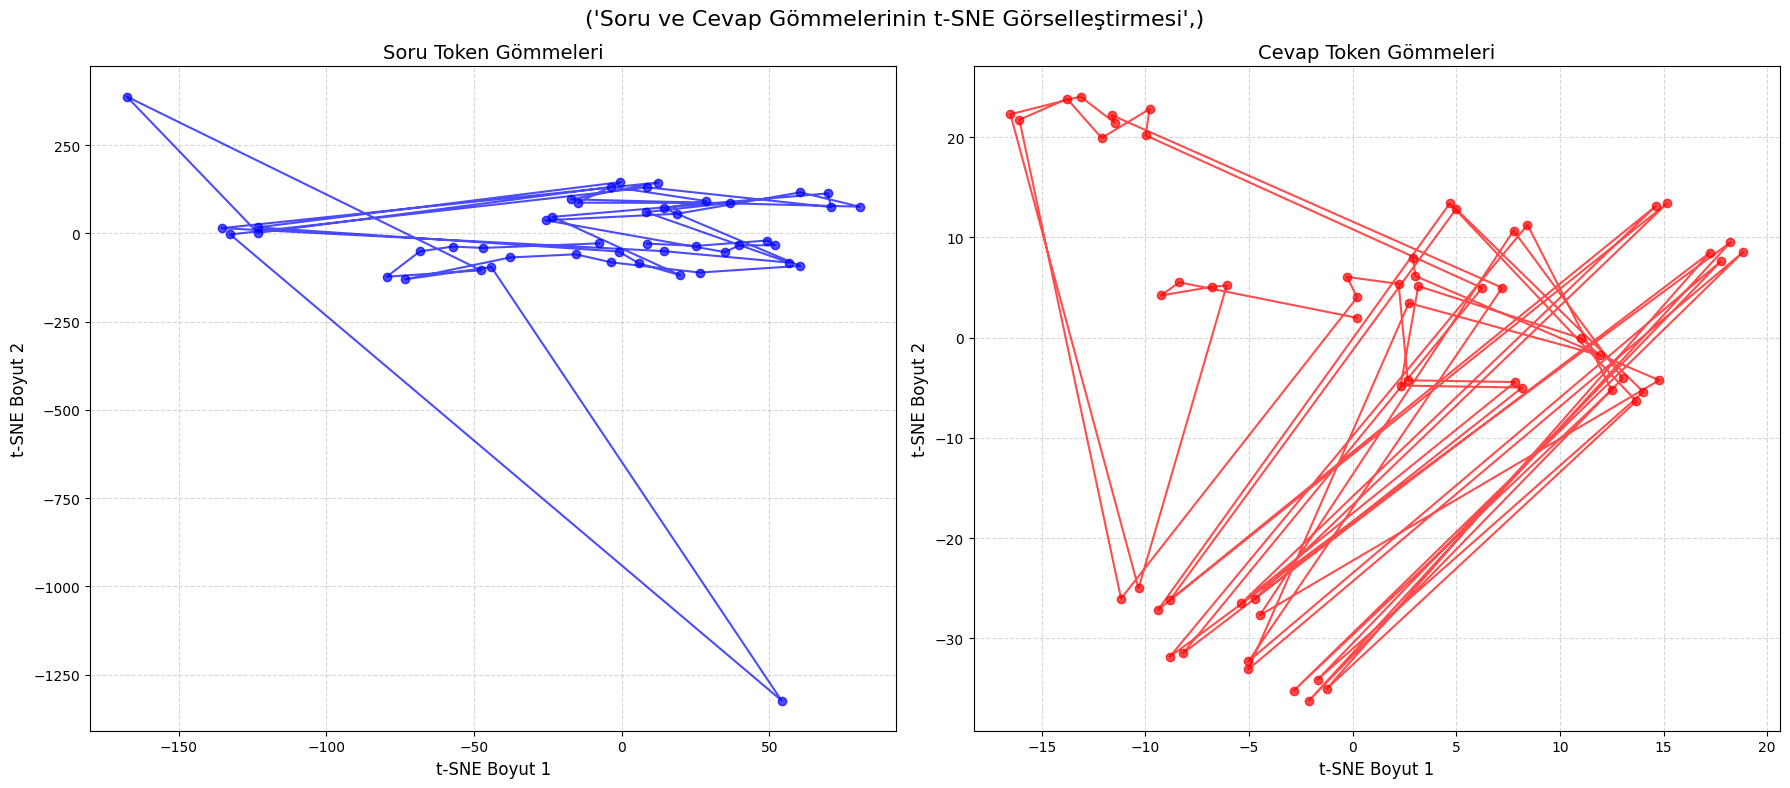

In [10]:
first_item = df.iloc[0]
for i, model_name in enumerate(model_names):
    save_prefix = get_save_prefix(model_name)
    raw_embeddings = read_embedding_from_file(save_prefix)
    tsne_res = tsne_sonuc_olustur(raw_embeddings, save_prefix)
    save_tsne_png(tsne_res, save_prefix)

    # bu kısım örnek amaçlı her model için ilk soru ve cevabın gömmelerini görselleştirir
    question_multi_token_embeddings = get_multi_token_embeddings(model, tokenizer, first_item["question"])
    question_multi_tsne = apply_multi_tsne(question_multi_token_embeddings)
    answer_multi_token_embeddings = get_multi_token_embeddings(model, tokenizer, first_item["answer"])
    answer_multi_tsne = apply_multi_tsne(answer_multi_token_embeddings)
    plot_two_tsne_results(question_multi_tsne, answer_multi_tsne, save_prefix, label1="Soru", label2="Cevap")


In [11]:
for i, model_name in enumerate(model_names):
    save_prefix = get_save_prefix(model_name)
    raw_embeddings = read_embedding_from_file(save_prefix)
    calculate_and_save_similarity_scores(raw_embeddings, save_prefix)

Satır 876 işlenemedi: Expecting ',' delimiter: line 1 column 3536 (char 3535)
intfloat_multilingual_e5_base_embeddings.json dosyasından 875 gömme vektörü yüklendi.
Hali hazırda hesaplanmış benzerlik skorları sayısı: 100 / 765625, bu kayıtlar atlanıyor.


ibm_granite_granite_embedding_107m_multilingual_embeddings.json dosyasından 10 gömme vektörü yüklendi.
Hali hazırda hesaplanmış benzerlik skorları sayısı: 100 / 100, bu kayıtlar atlanıyor.


intfloat_multilingual_e5_small_embeddings.json dosyasından 10 gömme vektörü yüklendi.
Hali hazırda hesaplanmış benzerlik skorları sayısı: 100 / 100, bu kayıtlar atlanıyor.


sentence_transformers_paraphrase_multilingual_MiniLM_L12_v2_embeddings.json dosyasından 10 gömme vektörü yüklendi.
Hali hazırda hesaplanmış benzerlik skorları sayısı: 100 / 100, bu kayıtlar atlanıyor.


shibing624_text2vec_base_multilingual_embeddings.json dosyasından 10 gömme vektörü yüklendi.
Hali hazırda hesaplanmış benzerlik skorları sayısı: 100 / 100, bu kayıtlar atlanıyor

In [12]:
for i, model_name in enumerate(model_names):
    save_prefix = get_save_prefix(model_name)
    similarity_scores = read_probability_from_file(save_prefix)
    get_and_save_all_top5_matches(similarity_scores, save_prefix)
    print(f"Benzerlikler hesaplandı ve kaydedildi: {model_name} ({i+1}/{len(model_names)})")

intfloat_multilingual_e5_base_probabilities.json dosyasından 765625 olasılık vektörü yüklendi.
10 soru→cevap ve 10 cevap→soru benzerlik sonuçları hali hazırda hesaplanmış.
875/875 benzerlik sonuçları hesaplandı ve kaydedildi.

875/875 benzerlik sonuçları hesaplandı ve kaydedildi.

Benzerlikler hesaplandı ve kaydedildi: intfloat/multilingual-e5-base (1/6)
ibm_granite_granite_embedding_107m_multilingual_probabilities.json dosyasından 100 olasılık vektörü yüklendi.
10 soru→cevap ve 10 cevap→soru benzerlik sonuçları hali hazırda hesaplanmış.




Benzerlikler hesaplandı ve kaydedildi: ibm-granite/granite-embedding-107m-multilingual (2/6)
intfloat_multilingual_e5_small_probabilities.json dosyasından 100 olasılık vektörü yüklendi.
10 soru→cevap ve 10 cevap→soru benzerlik sonuçları hali hazırda hesaplanmış.




Benzerlikler hesaplandı ve kaydedildi: intfloat/multilingual-e5-small (3/6)
sentence_transformers_paraphrase_multilingual_MiniLM_L12_v2_probabilities.json dosyasından 100 olasılık vektö

In [ ]:
answer_top_scores = []
question_top_scores = []
for i, model_name in enumerate(model_names):
    save_prefix = get_save_prefix(model_name)
    question_results = read_top1_top5_results_json(save_prefix, is_question_to_answer=True)
    answer_results = read_top1_top5_results_json(save_prefix, is_question_to_answer=False)
    question_top1_top5 = calculate_top1_top5_scores(question_results, model_name)
    answer_top1_top5 = calculate_top1_top5_scores(answer_results, model_name)
    question_top_scores.append(question_top1_top5)
    answer_top_scores.append(answer_top1_top5)